In [4]:
import pandas as pd

In [5]:
#leitura dos arquivos de dados
df1 = pd.read_excel('C:\DIO\Analise_dados_pandas\datasets\Aracaju.xlsx')
df2 = pd.read_excel('C:\DIO\Analise_dados_pandas\datasets\Fortaleza.xlsx')
# se nao tiver o r da pau por causa do \N  -> prefix the string with r (to produce a raw string):
df3 = pd.read_excel(r'C:\DIO\Analise_dados_pandas\datasets\Natal.xlsx')
df4 = pd.read_excel('C:\DIO\Analise_dados_pandas\datasets\Recife.xlsx')
df5 = pd.read_excel('C:\DIO\Analise_dados_pandas\datasets\Salvador.xlsx')


In [6]:
#juntando todos arquivos em um só. Todos tem a mesma estrutura.
df = pd.concat([df1, df2, df3, df4, df5])

In [11]:
#pegar uma amostra no conjunto de dados. 
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
110,Recife,2019-03-02,51.98,983,6
119,Recife,2019-03-02,152.30,982,7
173,Salvador,2019-01-02,31.77,1034,2
35,Aracaju,2018-01-01,40.60,1520,3
40,Aracaju,2018-01-01,6.99,1522,7


In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [14]:
#Alterando o tipo de dados de um coluna
df['LojaID'] = df['LojaID'].astype('object')

In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [21]:
##########################TRATANDO VALORES FALTANTES#############################
# Se for nulo traga a soma
df.isnull().sum()

0

In [34]:
#Substituindo os valores pela média -> inplace= true faz substituir os valores em memoria 
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)
#substitui pelo 0
df['Vendas'].fillna(0, inplace=True)

In [20]:
df['Vendas'].isnull().sum()

0

In [35]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [36]:
#Apagando as linhas com valores nulos com base em um determinada coluna
df.dropna(subset=['Vendas'], inplace=True)

In [25]:
#Removendo linhas que esta com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

In [8]:
#CRIANDO UMA NOVA COLUNA
df["Receitas"] = df['Qtde'].mul(df['Vendas'])

In [9]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [30]:
#Pegando a maior receita
df['Receitas'].max()

3544.0

In [41]:
#Pegando a menor
df['Receitas'].min()

3.34

In [42]:
#NLARGEST no caso traz os top 3
df.nlargest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [10]:
#nsmallest
df.nsmallest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [11]:
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [13]:
#ordenando o conjunto de dados do maior para o menor, ou seja, ordem decrescente
df.sort_values("Receitas", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [14]:
#transformando a data em tipo inteiro
df["Data"] = df["Data"].astype('int64')


In [17]:
df["Data"].dtype

dtype('<M8[ns]')

In [16]:
#transformando a coluna data em data
df["Data"] = pd.to_datetime(df["Data"])

In [18]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID               int64
Qtde                 int64
Receitas           float64
dtype: object

In [20]:
#Agrupamento por ano. Vai na data, pega o ano e soma as receitas
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [21]:
#Criando uma nova coluna com o ano
df['Vendas_Ano'] = df['Data'].dt.year

In [23]:
df['Vendas_Ano'].sample()

3    2019
Name: Vendas_Ano, dtype: int64

In [24]:
df['Vendas_Mes'], df['Vendas_dia'] = df['Data'].dt.month, df['Data'].dt.day

In [26]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Vendas_Ano,Vendas_Mes,Vendas_dia
165,Salvador,2019-01-02,11.54,1037,1,11.54,2019,1,2
135,Fortaleza,2019-03-02,10.79,983,5,53.95,2019,3,2
47,Salvador,2019-01-01,190.03,1036,2,380.06,2019,1,1
133,Natal,2019-01-02,153.71,1035,1,153.71,2019,1,2
167,Natal,2019-01-02,36.42,1037,1,36.42,2019,1,2
34,Salvador,2019-01-01,36.54,1037,3,109.62,2019,1,1
47,Recife,2019-01-01,8.60,983,3,25.80,2019,1,1
83,Natal,2019-01-02,63.66,1036,2,127.32,2019,1,2
234,Natal,2019-01-03,48.39,1035,2,96.78,2019,1,3
125,Recife,2019-03-02,37.60,983,4,150.40,2019,3,2


In [27]:
#trimestres de vendas
df['Vendas_Trimestre'] = df['Data'].dt.quarter

In [30]:
df.sample(25)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Vendas_Ano,Vendas_Mes,Vendas_dia,Vendas_Trimestre
40,Salvador,2019-02-13,161.87,1036,3,485.61,2019,2,13,1
50,Natal,2019-03-08,324.00,854,4,1296.00,2019,3,8,1
45,Fortaleza,2019-01-01,39.63,1004,3,118.89,2019,1,1,1
35,Salvador,2019-01-01,241.45,1037,1,241.45,2019,1,1,1
176,Natal,2019-01-02,19.42,1035,3,58.26,2019,1,2,1
2,Natal,2019-03-11,308.00,852,3,924.00,2019,3,11,1
87,Natal,2019-01-02,135.19,1034,2,270.38,2019,1,2,1
186,Salvador,2019-01-02,169.09,1036,2,338.18,2019,1,2,1
206,Salvador,2019-01-02,151.45,1036,2,302.90,2019,1,2,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,1


In [40]:
#trazer todas as vendas de março de 2019
vendas_marco_2019 = df.loc[((df['Data'].dt.month == 3) & (df['Data'].dt.year == 2019))]

In [41]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Vendas_Ano,Vendas_Mes,Vendas_dia,Vendas_Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,1
...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,1


In [42]:
#######################VISUALIZAÇÃO DE DADOS###############
#a loja de com codigo tal vendeu tanto
df['LojaID'].value_counts(ascending=False)


1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

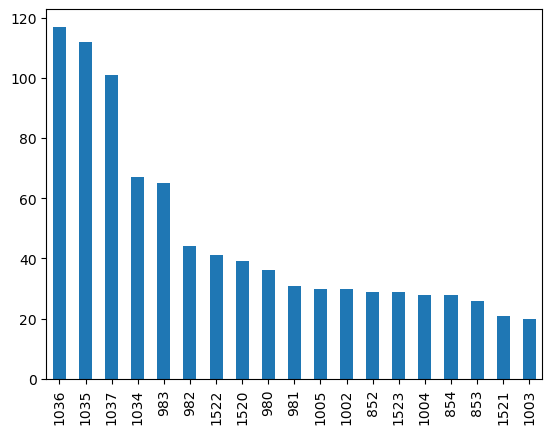

In [43]:
#trabalhando com a biblioteca Matplotlib junto com pandas
df['LojaID'].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

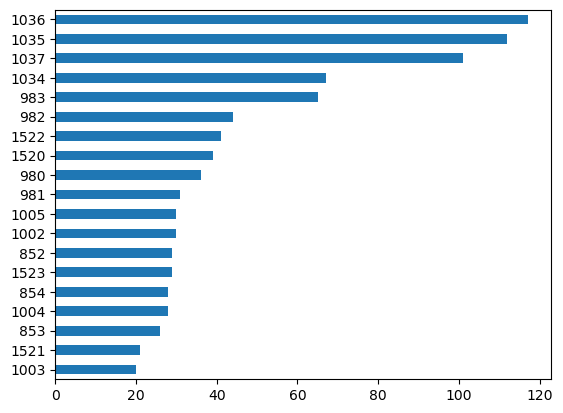

In [45]:
#grafico de barras horizotais basta adicionar o h ao codigo
df['LojaID'].value_counts(ascending=True).plot.barh()

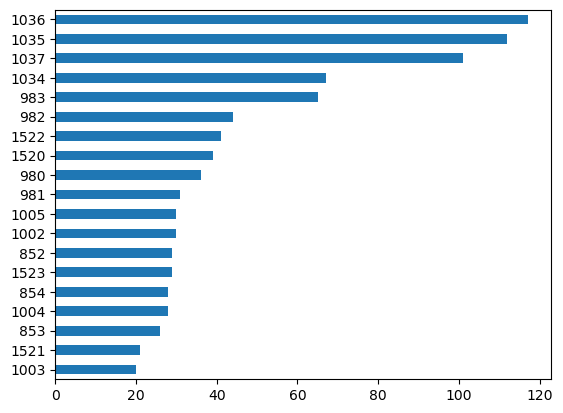

In [46]:
#Para tirar a linha em cima do grafico basta adicionar o ;
df['LojaID'].value_counts(ascending=True).plot.barh();

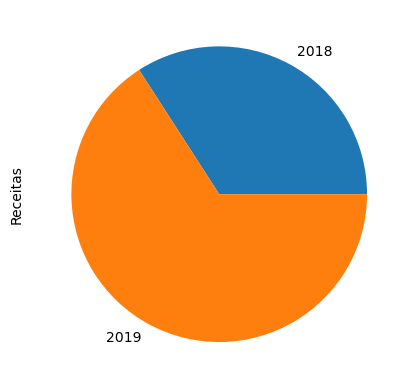

In [48]:
#Grafico pizza
df.groupby(df["Data"].dt.year)['Receitas'].sum().plot.pie();

In [50]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

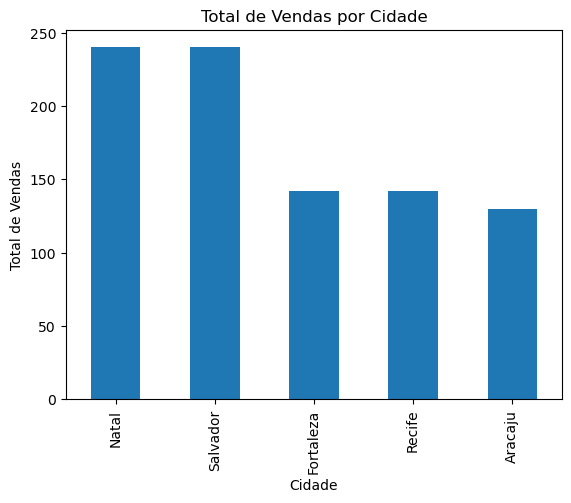

In [56]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade')
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

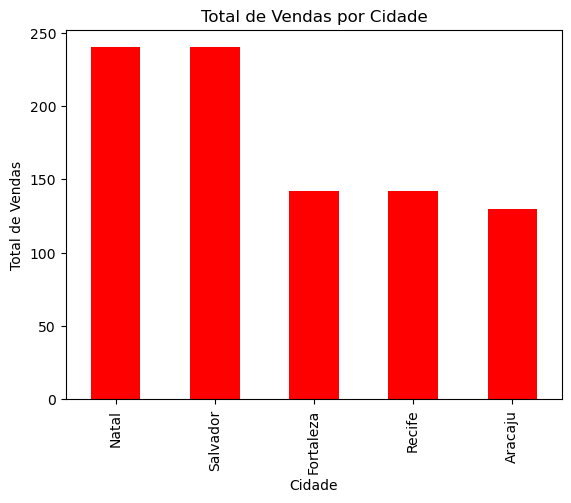

In [57]:
#ALTERANDO A COR DO GRAFICO
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade', color='red')
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [58]:
#alterando o estilo do grafico
plt.style.use('ggplot')


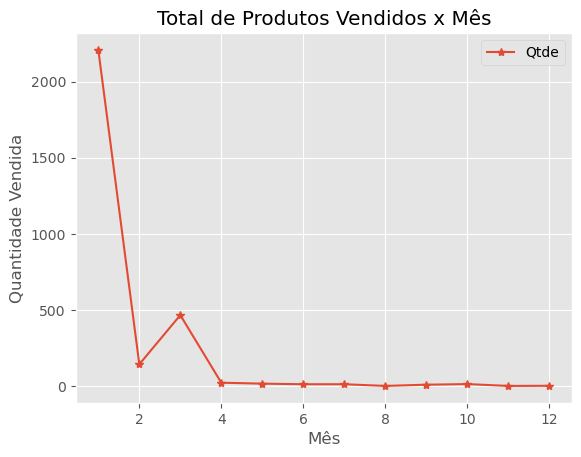

In [64]:
df.groupby(df["Vendas_Mes"])['Qtde'].sum().plot(title = 'Total de Produtos Vendidos x Mês', marker='*')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Mês')
plt.legend();

In [72]:
df_2019 = df[df["Vendas_Ano"] == 2019]
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Vendas_Ano,Vendas_Mes,Vendas_dia,Vendas_Trimestre
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,1
...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,1


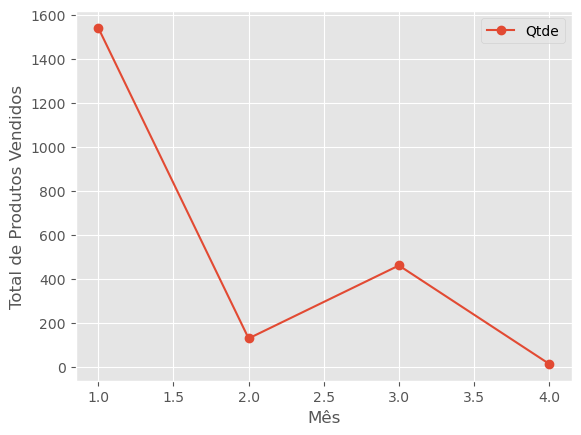

In [76]:
df_2019.groupby(df_2019["Vendas_Mes"])['Qtde'].sum().plot(marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

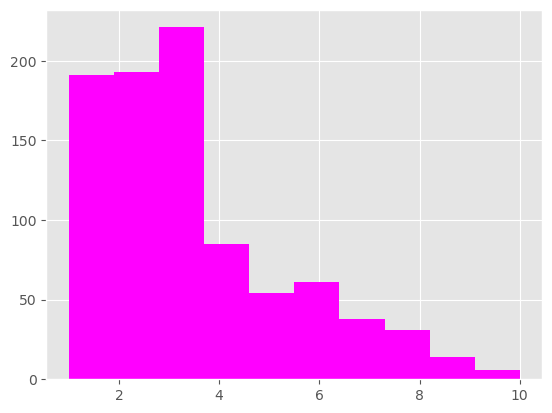

In [77]:
#histograma
plt.hist(df['Qtde'], color='magenta')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


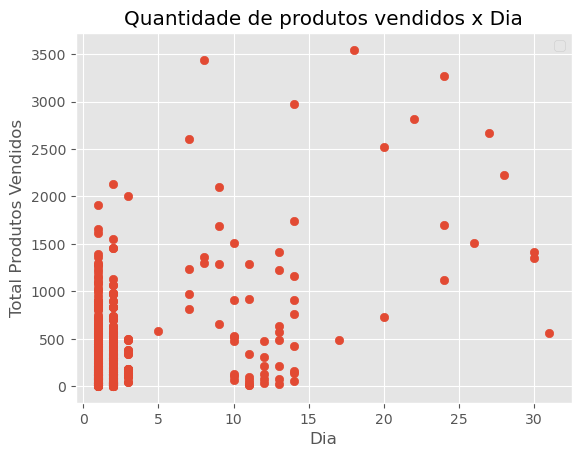

In [82]:
#grafico de dispoersão
plt.scatter(x=df_2019['Vendas_dia'], y = df_2019['Receitas'])
plt.title('Quantidade de produtos vendidos x Dia')
plt.xlabel('Dia')
plt.ylabel("Total Produtos Vendidos")
plt.legend();

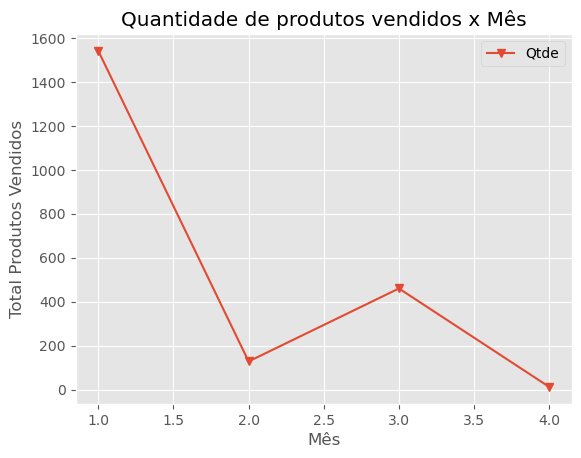

In [80]:
#salvando em png
df_2019.groupby(df_2019['Vendas_Mes'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig('grafico_qtdexmes.png')